<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/Exploraci%C3%B3n_de_los_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORACIÓN DE DATOS (TRAIN):**

###FELIPE ANTONIO MELO CIFUENTES

###MARIA CAMILA RAMIREZ FERRO




#####Importar librerias:


In [0]:
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib
import pylab as plt
import seaborn as sns
%matplotlib inline

##### Permisos y cambio de directorio:

In [35]:
#Permisos
drive.mount('/gdrive')

#Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis

# Contenido del Directorio actual
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Tesis
 Leer-Csv-Prueba.ipynb        Prueba                  train.csv
'Leer CSV train.ipynb'        Prueba-v2-csv           train_images/
'Leer imágenes-Tesis.ipynb'   sample_submission.csv
 Pre-procesamiento            test_images/


##### Lectura del archivo csv train:

In [36]:
# Creación de la variable df_train
df_train = pd.read_csv('train.csv')

#Muesta los primeros registros de df_train
df_train.shape
#df_train.head()

(22184, 2)

##### Exploración de los datos

Cantidad de registros dentro de train.csv:  22184
Registros validos en la columna EncodedPixels train.csv:  11836
Registros nulos en la columna EncodedPixels train.csv:  10348



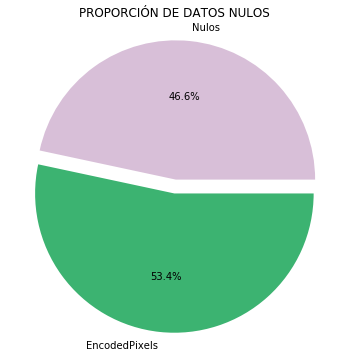

In [37]:
# Porcentaje de nulos
labels = 'Nulos','EncodedPixels'
sizes = [len(df_train) - df_train.EncodedPixels.count(),df_train.EncodedPixels.count()]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(6, 6))
colores= ['#D8BFD8','#3CB371']
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colores)
ax.axis('equal')
ax.set_title('PROPORCIÓN DE DATOS NULOS')
print("Cantidad de registros dentro de train.csv: ",len(df_train))
print("Registros validos en la columna EncodedPixels train.csv: ",df_train.EncodedPixels.count())
print("Registros nulos en la columna EncodedPixels train.csv: ",len(df_train)-df_train.EncodedPixels.count())
print("")
plt.show()

In [38]:
# Separar columna "Image_Label"
df_split = df_train["Image_Label"].str.split("_", n = 1, expand = True)

# Agregar nuevas columnas (Image,Label) a df_train
df_train['Image'] = df_split[0]
df_train['Label'] = df_split[1]

df_train.head()

,Image_Label,EncodedPixels,Image,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,0011165.jpg_Gravel,NaN,0011165.jpg,Gravel
3,0011165.jpg_Sugar,NaN,0011165.jpg,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


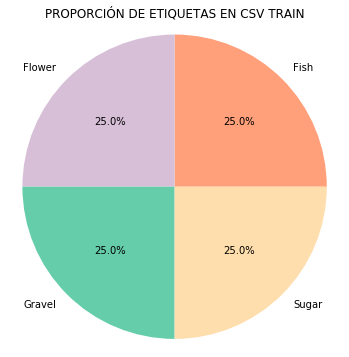

Nota:
Cada imagen cuenta con las cuatro etiquetas de clasificación de nubes,
independientemente de que la imagen no contenga todos los tipos de nube.


In [39]:
# Conteo por label contra la columna "Image_Label"
fish = df_train[df_train['Label'] == 'Fish'].Image_Label.count()
flower = df_train[df_train['Label'] == 'Flower'].Image_Label.count()
gravel = df_train[df_train['Label'] == 'Gravel'].Image_Label.count()
sugar = df_train[df_train['Label'] == 'Sugar'].Image_Label.count()

labels = 'Fish', 'Flower', 'Gravel', 'Sugar'
sizes = [fish, flower, gravel, sugar]

fig, ax = plt.subplots(figsize=(6, 6))
colores= ['#FFA07A','#D8BFD8','#66CDAA','#FFDEAD']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
ax.axis('equal')
ax.set_title('PROPORCIÓN DE ETIQUETAS EN CSV TRAIN')

plt.show()
print("Nota:")
print("Cada imagen cuenta con las cuatro etiquetas de clasificación de nubes,")
print("independientemente de que la imagen no contenga todos los tipos de nube.")

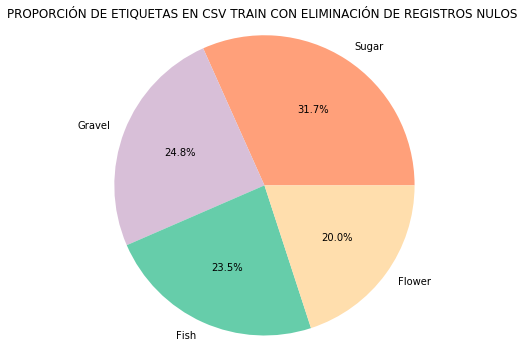

Nota:
Al eliminar los registro nulos, se evidencia una proporción distinta
en las etiquetas.


In [40]:
# Conteo por label contra la columna "EncodedPixels"
fish = df_train[df_train['Label'] == 'Fish'].EncodedPixels.count()
flower = df_train[df_train['Label'] == 'Flower'].EncodedPixels.count()
gravel = df_train[df_train['Label'] == 'Gravel'].EncodedPixels.count()
sugar = df_train[df_train['Label'] == 'Sugar'].EncodedPixels.count()

labels = 'Sugar', 'Gravel', 'Fish', 'Flower'
sizes = [sugar, gravel, fish, flower]

fig, ax = plt.subplots(figsize=(6, 6))
colores= ['#FFA07A','#D8BFD8','#66CDAA','#FFDEAD']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
ax.axis('equal')
ax.set_title('PROPORCIÓN DE ETIQUETAS EN CSV TRAIN CON ELIMINACIÓN DE REGISTROS NULOS')

plt.show()
print("Nota:")
print("Al eliminar los registro nulos, se evidencia una proporción distinta")
print("en las etiquetas.")

In [41]:
gr = df_train.loc[df_train['EncodedPixels'].isnull() == False, 'Image_Label'].apply(lambda x: x.split('_')[0]).value_counts().value_counts()
print(gr)
print("")
print("Nota:")
print("Se evidencia que la tendencia de los datos es que una imagen contenga dos etiquetas.")
print("Cabe resaltar que únicamente 266 imagenes cuentan con las cuatro etiquetas.")
print("")
print("Lo anterior para un total de:",len(df_train['Image'].unique()), "imagenes.")

2    2372
3    1560
1    1348
4     266
Name: Image_Label, dtype: int64

Nota:
Se evidencia que la tendencia de los datos es que una imagen contenga dos etiquetas.
Cabe resaltar que únicamente 266 imagenes cuentan con las cuatro etiquetas.

Lo anterior para un total de: 5546 imagenes.


In [44]:
# Creación de columnas por cada label
df_trainfxd = pd.get_dummies(df_train, columns = ['Label'])

# Llenado de los datos nulos
df_trainfxd = df_trainfxd.fillna('-1')

# Definición de función para llenado de registros dummies
def fill_dummies(row, label):
    if label == 'fish':
        return row['Label_Fish'] * (row['EncodedPixels'] != '-1')
    if label == 'flower':
        return row['Label_Flower'] * (row['EncodedPixels'] != '-1')
    if label == 'gravel':
        return row['Label_Gravel'] * (row['EncodedPixels'] != '-1')
    if label == 'sugar':
        return row['Label_Sugar'] * (row['EncodedPixels'] != '-1')
    
# Ejecución de función "fill_dummies" para el llenado de registros 
df_trainfxd['Label_Fish'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'fish'), axis=1)
df_trainfxd['Label_Flower'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'flower'), axis=1)
df_trainfxd['Label_Gravel'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'gravel'), axis=1)
df_trainfxd['Label_Sugar'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'sugar'), axis=1)
orginal_shape = df_trainfxd.shape

print("Tomado de: https://www.kaggle.com/aleksandradeis/understanding-clouds-eda")
print("")
df_trainfxd.head()

Tomado de: https://www.kaggle.com/aleksandradeis/understanding-clouds-eda



,Image_Label,EncodedPixels,Image,Label_Fish,Label_Flower,Label_Gravel,Label_Sugar
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,1,0,0,0
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,0,1,0,0
2,0011165.jpg_Gravel,-1,0011165.jpg,0,0,0,0
3,0011165.jpg_Sugar,-1,0011165.jpg,0,0,0,0
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,1,0,0,0


In [68]:
# Creación de nueva matriz de columna "Image" contra los labels dentro de ella
df_trainfxd = df_trainfxd.groupby('Image')['Label_Fish', 'Label_Flower', 'Label_Gravel', 'Label_Sugar'].max()
print(df_trainfxd.shape)
df_trainfxd.head()

(5546, 4)


,Label_Fish,Label_Flower,Label_Gravel,Label_Sugar
Image,,,,
0011165.jpg,1,1,0,0
002be4f.jpg,1,1,0,1
0031ae9.jpg,1,1,0,1
0035239.jpg,0,1,1,0
003994e.jpg,1,0,1,1


Tomado de: https://www.kaggle.com/aleksandradeis/understanding-clouds-eda



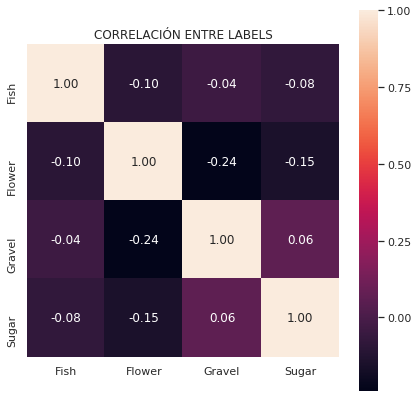

In [71]:
#Mapa de calor de corelación entre labels
corrs = np.corrcoef(df_trainfxd.values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = ['Fish', 'Flower', 'Gravel', 'Sugar'], 
               xticklabels = ['Fish', 'Flower', 'Gravel', 'Sugar']).set_title('CORRELACIÓN ENTRE LABELS')

print("Tomado de: https://www.kaggle.com/aleksandradeis/understanding-clouds-eda")
print("")
fig = hm.get_figure()